In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from scipy.stats import skew
from scipy.stats.stats import pearsonr

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve

In [3]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    rmse = np.mean(rmse)
    return(rmse)

In [60]:
def cv_score(model):
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_score = np.mean(cv_score)
    return(cv_score)

In [5]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [6]:
dataset = pd.read_csv("data/OnlineNewsPopularity.csv", sep=',', header = 0)

In [7]:
full_data = dataset.copy()

In [8]:
full_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [9]:
full_data_dropped = full_data.iloc[:,2:]

In [ ]:
full_data_dropped[' shares'].hist()
plt.show()

In [22]:
full_data_dropped[' shares'].median()

1400.0

In [23]:
full_data_dropped['Pop'] = np.where(full_data_dropped[' shares'] > full_data_dropped[' shares'].median(), 1, 0 )

## Data Scaling

In [25]:
y = full_data_dropped['Pop']

In [28]:
X = full_data_dropped.iloc[:,2:-2]

In [29]:
X.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [31]:
std = StandardScaler()

In [32]:
X_train = pd.DataFrame(std.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(std.fit_transform(X_test), columns = X_test.columns)

In [33]:
X_train.head()

,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,-0.003513,-0.000555,0.022779,-0.078715,-0.335552,-0.426637,1.392163,0.065381,-0.119612,-0.235687,...,0.093191,-0.466522,0.982105,-0.921108,-0.500288,0.605285,0.670576,1.614146,-1.813262,1.517394
1,0.005942,-0.000555,0.024138,-0.786747,-0.851242,-0.426637,-0.304768,0.042486,-0.119612,-0.235687,...,0.930774,0.062502,0.982105,-0.291864,-0.959912,0.079110,1.749168,0.674169,0.041793,0.413758
2,-0.011568,-0.000555,-0.005871,0.009789,0.437983,-0.426637,-0.062349,0.134068,-0.645101,-0.235687,...,-0.635507,-0.466522,0.982105,-0.132484,0.074243,0.605285,0.145547,0.416546,-0.910272,0.111280
3,-0.006172,-0.000555,-0.026150,0.717822,-0.593397,0.901332,-0.304768,0.109963,1.456854,-0.235687,...,-0.743339,0.062502,-1.037493,-0.055388,-0.270475,-0.183978,0.670576,-1.205785,-1.813262,0.413758
4,0.002147,-0.000555,0.010328,-0.432731,-0.335552,-0.426637,-0.304768,0.470871,0.931365,-0.235687,...,0.465838,0.062502,0.982105,-0.280086,-0.959912,-0.505529,-0.870270,-0.265808,0.836816,-0.689877


## KNNs

In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
knn_cv_score = cv_score(knn)
knn_cv_score

0.60406723842045262

In [50]:
knn_pred = cross_val_predict(knn, X_train, y_train, cv=5)

In [51]:
conf_mat = confusion_matrix(y_train, knn_pred)
conf_mat

array([[10428,  5676],
       [ 6881,  8730]])

In [52]:
fpr, tpr, thresholds = roc_curve(y_train, knn_pred)

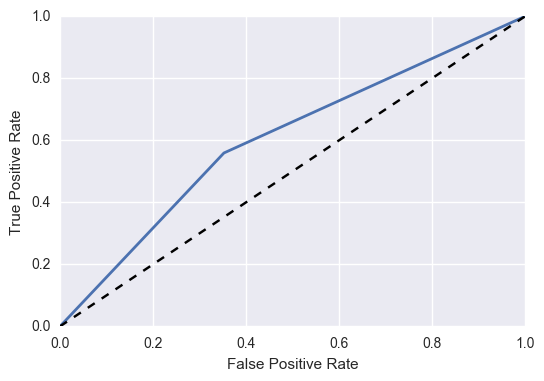

In [53]:
plot_roc_curve(fpr, tpr)
plt.show()

## Logistic Regression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

array([ 0.65494956,  0.65426454,  0.65599874,  0.64385937,  0.64742983])

In [63]:
lr_cv_score = cv_score(lr)
lr_cv_score

0.65130040927870803

In [ ]:
NB_cv_score = cv_score(NB)
NB_cv_score

## Random Forest

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [68]:
rf_cv_score = cv_score(rf)
rf_cv_score

0.62156681463181607

## SVC

In [70]:
svc = SVC()

In [71]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
svc_cv_score = cv_score(svc)
svc_cv_score

0.6554302659018687

In [75]:
model_rank = pd.DataFrame(
    {'Model' : ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', ]
        ,
     'CV Score': [lr_cv_score,rf_cv_score
                  ,knn_cv_score,svc_cv_score]
     }    
)

In [76]:
model_rank.sort_values(by='CV Score', ascending = False)

,CV Score,Model
3,0.655430,SVM
0,0.651300,Logistic Regression
1,0.621567,Random Forest
2,0.604067,KNN


## Grid Searching

In [80]:
rf_params_grid = [
{'n_estimators':[3,10,30,300], 'max_features':[2,4,6,8], 'max_depth':[None, 1, 2], 'bootstrap':[False,True]}
]

In [83]:
rf_grid_search = GridSearchCV(rf, rf_params_grid, cv = 3, scoring = 'accuracy')

In [85]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30, 300], 'bootstrap': [False, True], 'max_depth': [None, 1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [86]:
rf_grid_search.best_score_

0.66328235850543904

In [87]:
lr_params_grid = [
{'C':[0.01,1,10]}
]

In [89]:
lr_grid_search = GridSearchCV(lr, lr_params_grid, cv = 3, scoring = 'accuracy')

In [90]:
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [91]:
lr_grid_search.best_score_

0.65057543749014657

In [92]:
svc_params_grid = [
{'C':[0.01,1,10]}
]

In [95]:
svc_grid_search = GridSearchCV(svc, svc_params_grid, cv = 3, scoring = 'accuracy')

In [96]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [97]:
svc_grid_search.best_score_

0.65297177991486677

In [98]:
final_model = rf_grid_search.best_estimator_

In [99]:
final_pred = final_model.predict(X_test)

In [100]:
conf_mat = confusion_matrix(y_test, final_pred)
conf_mat

array([[2680, 1298],
       [1422, 2529]])

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, final_pred)

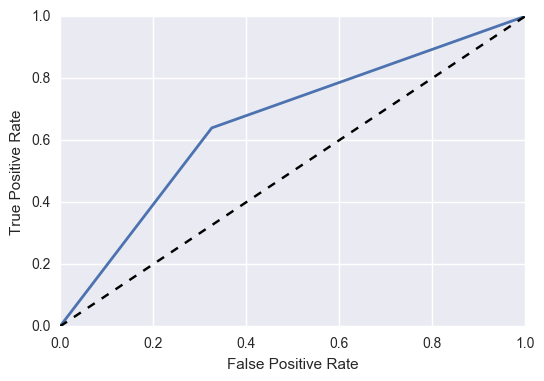

In [103]:
plot_roc_curve(fpr, tpr)
plt.show()

In [104]:
print(classification_report(y_test, final_pred, target_names = ["Popular", "Not Popular"]))

             precision    recall  f1-score   support

    Popular       0.65      0.67      0.66      3978
Not Popular       0.66      0.64      0.65      3951

avg / total       0.66      0.66      0.66      7929

